# Hamburg Appartement Market Data Analysis and Modelling

<br>

### What factors impact the price the most?

<br>

#### 1. Which neighborhood has the highest impact?
#### 2. How do space and the number of rooms relate to the price?
#### 3. Are private offers cheaper than professional offers?
#### 4. How do other factors impact the price?

### Importing packages

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading in the data

In [3]:
#the data comes from different excel files I scraped over a few months.
files = []
frames = []

for f in glob.glob(".\Data\*.xlsx"):
    files.append(f)
    frames.append(pd.read_excel(f, sheet_name="Sheet1"))

df = pd.concat(frames)

In [4]:
df.shape

(68325, 21)

In [5]:
df.head()

,ID,Haus/Wohnung,ID.1,Miete/Kauf,address,balcony,builtInKitchen,city,floorplan,from,...,lat,livingSpace,lon,numberOfRooms,postcode,price,privateOffer,quarter,title,url
0,107053440,Wohnung,107053440,Kauf,"Julius-Vosseler-Strasse 82a, Lokstedt, Hamburg",True,False,Hamburg,False,001.507379,...,53.59171,43.67,9.94497,2.0,22527,272937.5,False,Lokstedt,Eigentumswohnungen in Hamburg-Lokstedt,https://www.immobilienscout24.de/expose/107053440
1,109298032,Wohnung,109298032,Kauf,"Ohlsdorf, Hamburg",True,False,Hamburg,True,002.01004919249,...,NaN,117.00,NaN,4.0,22335,629800.0,False,Ohlsdorf,"629.800 €, 117 m², 4 Zimmer",https://www.immobilienscout24.de/expose/109298032
2,108673845,Wohnung,108673845,Kauf,"Alsterufer 10, Rotherbaum, Hamburg",False,False,Hamburg,False,001.5759162,...,53.56033,231.00,9.99611,5.0,20354,3520000.0,False,Rotherbaum,THE 10 - Luxury Flat mit Alsterblick für die F...,https://www.immobilienscout24.de/expose/108673845
3,108673576,Wohnung,108673576,Kauf,"Barmbek-Nord, Hamburg",True,True,Hamburg,True,001.5759162,...,NaN,97.00,NaN,3.0,22305,549000.0,False,Barmbek-Nord,Moderne 3-Zimmer-Wohnung mit Weitblick,https://www.immobilienscout24.de/expose/108673576
4,107298572,Wohnung,107298572,Kauf,"Grete-Zabe-Weg 13, Barmbek-Süd, Hamburg",True,False,Hamburg,True,001.177210,...,53.57751,64.43,10.05623,2.0,22081,398000.0,False,Barmbek-Süd,Citynah mit Blick ins Grüne: 2 Zimmer mit XL B...,https://www.immobilienscout24.de/expose/107298572


### Preprocessing the data

In [14]:
#I often sraped the data on censecutive days which results in duplicates
#I use the "ID" to identify the duplicates and drop them
dfu = df.drop_duplicates(subset="ID")

In [15]:
dfu.shape

(8309, 21)

In [16]:
#dropping columns I wont need.
dfu = dfu.drop(columns=["ID.1", "from", "title", "url", "Haus/Wohnung", "Miete/Kauf"])
dfu.head()

,ID,address,balcony,builtInKitchen,city,floorplan,garden,lat,livingSpace,lon,numberOfRooms,postcode,price,privateOffer,quarter
0,107053440,"Julius-Vosseler-Strasse 82a, Lokstedt, Hamburg",True,False,Hamburg,False,False,53.59171,43.67,9.94497,2.0,22527,272937.5,False,Lokstedt
1,109298032,"Ohlsdorf, Hamburg",True,False,Hamburg,True,True,NaN,117.00,NaN,4.0,22335,629800.0,False,Ohlsdorf
2,108673845,"Alsterufer 10, Rotherbaum, Hamburg",False,False,Hamburg,False,False,53.56033,231.00,9.99611,5.0,20354,3520000.0,False,Rotherbaum
3,108673576,"Barmbek-Nord, Hamburg",True,True,Hamburg,True,False,NaN,97.00,NaN,3.0,22305,549000.0,False,Barmbek-Nord
4,107298572,"Grete-Zabe-Weg 13, Barmbek-Süd, Hamburg",True,False,Hamburg,True,False,53.57751,64.43,10.05623,2.0,22081,398000.0,False,Barmbek-Süd


In [12]:
#looking for missing data
dfu.isnull().sum().sort_values(ascending=False)

lon               5999
lat               5999
quarter              0
city                 0
Haus/Wohnung         0
Miete/Kauf           0
address              0
balcony              0
builtInKitchen       0
garden               0
floorplan            0
privateOffer         0
livingSpace          0
numberOfRooms        0
postcode             0
price                0
ID                   0
dtype: int64

In [17]:
#I will drop lon and lat because there are too many missing values
dfu = dfu.drop(columns=["lon", "lat"])

In [92]:
def plotchart(column):
    plt.figure(figsize=(10,5))
    ch = sns.countplot(dfu[column])
    ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')

In [93]:
columns = dfu.columns
columns

Index(['ID', 'address', 'balcony', 'builtInKitchen', 'city', 'floorplan',
       'garden', 'livingSpace', 'numberOfRooms', 'postcode', 'price',
       'privateOffer', 'quarter'],
      dtype='object')

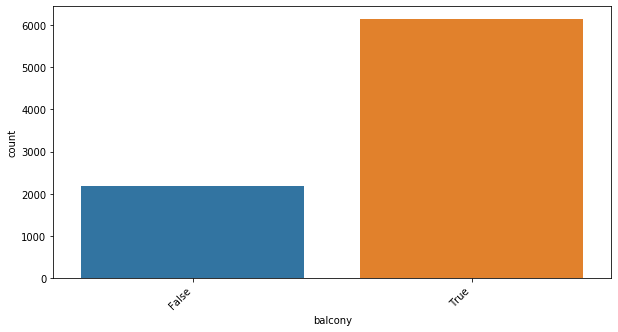

In [94]:
plotchart("balcony")

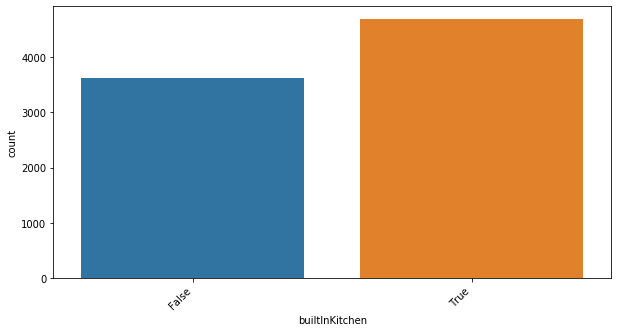

In [95]:
plotchart("builtInKitchen")

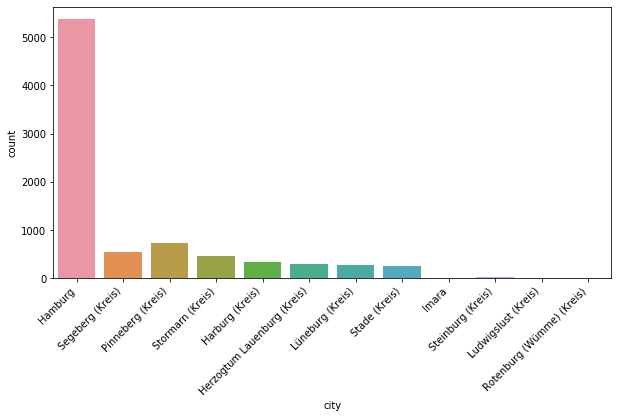

In [96]:
plotchart("city")

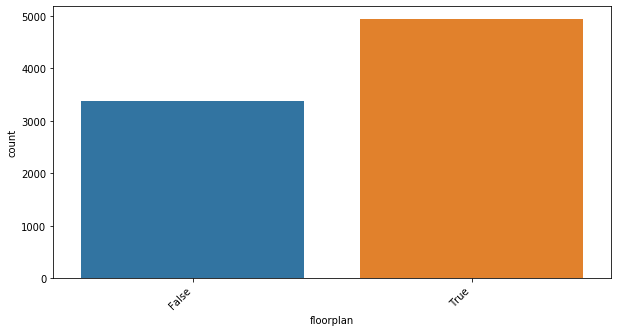

In [97]:
plotchart("floorplan")

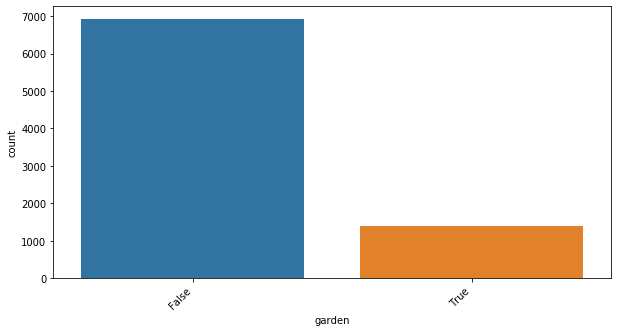

In [98]:
plotchart("garden")

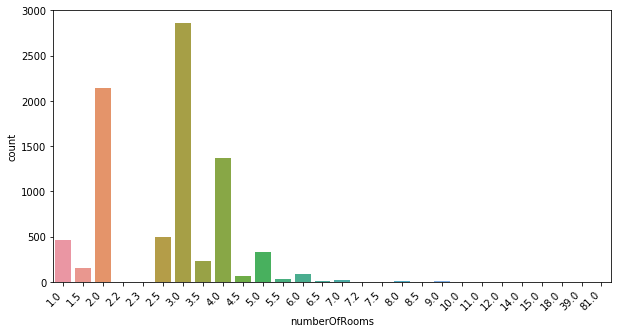

In [99]:
plotchart("numberOfRooms")

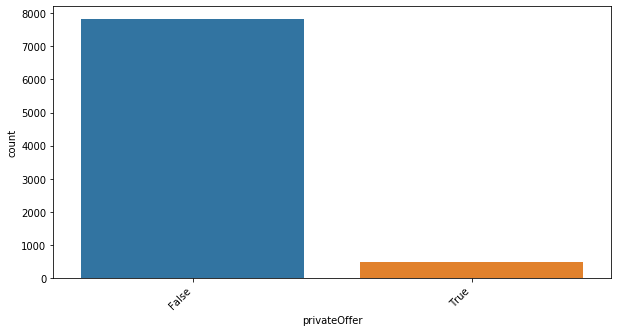

In [100]:
plotchart("privateOffer")

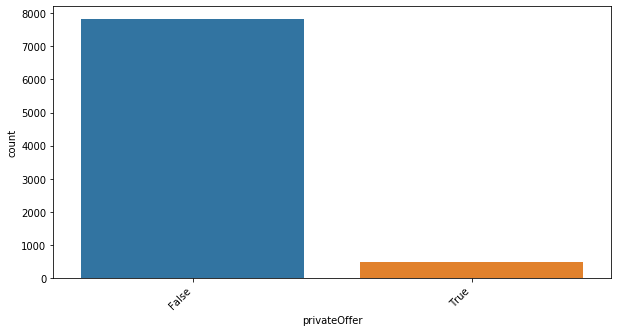

In [101]:
plotchart("privateOffer")

(array([7.696e+03, 4.370e+02, 1.130e+02, 3.900e+01, 1.500e+01, 4.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([       0.,  1010000.,  2020000.,  3030000.,  4040000.,  5050000.,
         6060000.,  7070000.,  8080000.,  9090000., 10100000.]),
 <a list of 10 Patch objects>)

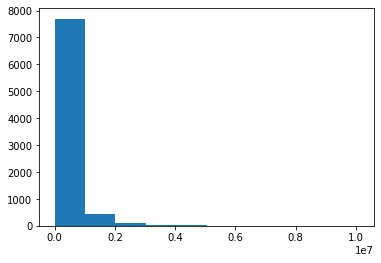

In [102]:
plt.hist(dfu["price"])

(array([8.049e+03, 2.460e+02, 1.200e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <a list of 10 Patch objects>)

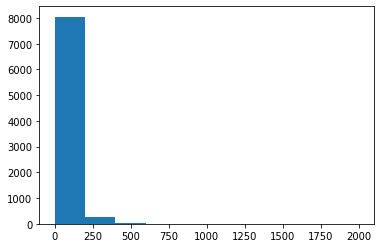

In [103]:
plt.hist(dfu["livingSpace"])

In [114]:
def plotcharttopn(column, n):
    
    plt.figure(figsize=(10,5))
    ch = sns.countplot(dfu[column], order=dfu[column].value_counts().iloc[:n].index)
    ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')

#'quarter', 'postcode' top n

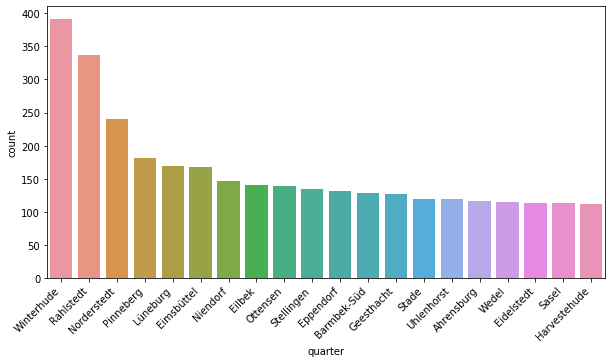

In [115]:
plotcharttopn("quarter", 20)

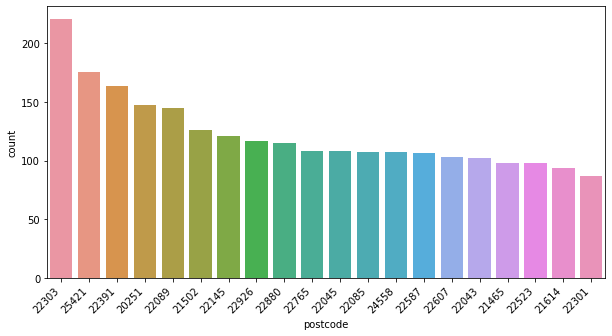

In [117]:
plotcharttopn("postcode", 20)